In [11]:
import pandas as pd
country_name = 'Azerbaijan'

We need to handle different country names from F1 dataset and UN dataset, we only have the below countries in map to handle, other countries work find

In [12]:
country_map = {
    'UK':	'United Kingdom of Great Britain and Northern Ireland',
    'China':	'China, People\'s Republic of',
    'USA'	:'United States',
    'UAE'	:'United Arab Emirates',
    'Korea'	:'Democratic People\'s Republic of Korea',
    'Russia'	:'Russian Federation',
    'Vietnam':'Viet Nam'
}



---


Load all circuits in the world, taken from 
https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020/version/14

In [13]:
#Data Pipeline : Extract
circuits_df = pd.read_csv("/content/circuits.csv")
for key in country_map.keys():
  circuits_df.loc[circuits_df['country'] == key, 'country'] = country_map[key]



---


Load countries GDP taken from UN datasets:
http://data.un.org/Explorer.aspx?d=SNA&f=group_code%3a103

In [14]:
gdp_df = pd.read_csv('/content/UNdata_Export_20220114_142020371.csv')
print("total number of records: ", gdp_df.count())
print("columns: ", gdp_df.columns)

total number of records:  Country or Area    10082
Year               10082
Item               10082
Value              10082
dtype: int64
columns:  Index(['Country or Area', 'Year', 'Item', 'Value'], dtype='object')


We only need to maintain the records in GDP related to the countries having a circuit(s), this is going to be done by filtering GDP data set by using countries listed from the circuits data

In [15]:
circuites_countries = circuits_df['country']
circuites_countries = circuites_countries.drop_duplicates()
circuites_countries.count()

35

In [16]:
target_gdp_df = gdp_df[gdp_df['Country or Area'] == country_name]
jordan_gdp_df = gdp_df[gdp_df['Country or Area'] == 'Jordan']
print(target_gdp_df.count())
target_gdp_df.head()

Country or Area    30
Year               30
Item               30
Value              30
dtype: int64


,Country or Area,Year,Item,Value
580,Azerbaijan,2019,Gross Domestic Product (GDP),4781.946215
581,Azerbaijan,2018,Gross Domestic Product (GDP),4735.142880
582,Azerbaijan,2017,Gross Domestic Product (GDP),4150.868844
583,Azerbaijan,2016,Gross Domestic Product (GDP),3889.363166
584,Azerbaijan,2015,Gross Domestic Product (GDP),5515.707291




---


Get the racing years related to this country

In [17]:
circuitId = None
cid_df = circuits_df[circuits_df['country'] == country_name]['circuitId']
if len(cid_df) > 0:
  circuitId = cid_df.values[0]
print(country_name+" circuit id is " + str(circuitId))

Azerbaijan circuit id is 73


In [18]:
races_df = pd.read_csv('/content/races.csv')
races_df = races_df[races_df['circuitId'] == circuitId]
racing_years = races_df['year'].values
print("races hosted by this country: " + str(racing_years))

races hosted by this country: [2016 2017 2018 2019 2021 2022]


In [19]:
# Multiple Bar Graph
import matplotlib.pyplot as plt
import numpy as np


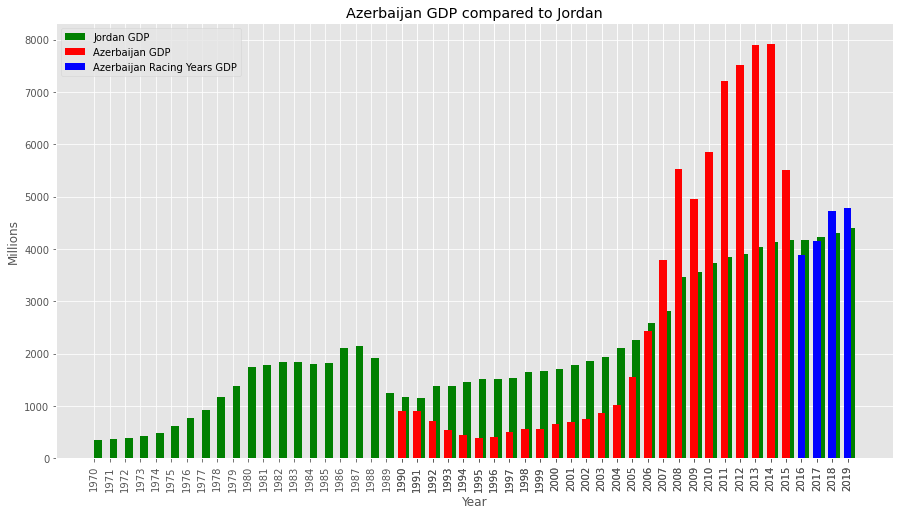

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))

width=0.5

gdp_in_racing_years = target_gdp_df[target_gdp_df['Year'].isin(racing_years)]
gdp_in_not_racing_years = target_gdp_df[~target_gdp_df['Year'].isin(racing_years)]

# Multiple Bar Graph
x_labels = pd.concat([target_gdp_df[['Year']], jordan_gdp_df[['Year']]])['Year']
# first location for first bar in x-axis


plt.bar(jordan_gdp_df['Year'], jordan_gdp_df['Value'], width, label="Jordan GDP", color = 'green',align='edge')
plt.bar(gdp_in_not_racing_years['Year'], gdp_in_not_racing_years['Value'], width, label=(country_name + " GDP"), color='red')
plt.bar(gdp_in_racing_years['Year'], gdp_in_racing_years['Value'], width, label=(country_name + " Racing Years GDP"), color='blue')


plt.title(country_name + " GDP compared to Jordan")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Millions")
plt.xticks(x_labels)
plt.legend()
plt.show()
